<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/optimization/Taylor_Polynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Look at `jax.jvp + vmap`: [here](https://github.com/google/jax/issues/1012), [here](https://github.com/google/jax/pull/2099)
*   [composes forward-mode autodiff with partial evaluation](https://github.com/google/jax/issues/526)




This note follows from a couple of lectures:
*   [Gilbert's Strang's lecture](https://www.youtube.com/watch?v=U0xlKuFqCuI&t=392s), [Linear Algebra](https://www.youtube.com/watch?v=qWTcD_VQd8w&t=5s), [3Blue1Brown](https://www.youtube.com/watch?v=3d6DsjIBzJ4&list=PL0-GT3co4r2wlh6UHTUeQsrf3mlS2lk6x&index=11), [Implicit Layers Tutorial](http://implicit-layers-tutorial.org/implicit_functions/), [Matthew Johnson](https://gist.github.com/mattjj/02ae95e51ead485223245d343efbd461)




In [1]:
#@title Import Modules { display-mode: "form" }
import jax
import jax.numpy as jnp
from jax import random, grad, vmap 
import matplotlib.pyplot as plt 
import seaborn as sns
import altair as alt
import pandas as pd
from functools import partial
from math import factorial 

import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set_style('whitegrid')

### First Order Taylor Polynomials (First-order oracle)

Let's say we want to approximate a function, $f$, at some point, $x_0$.

For example: $f(x): e^x$ around $x_0 = 0.25$

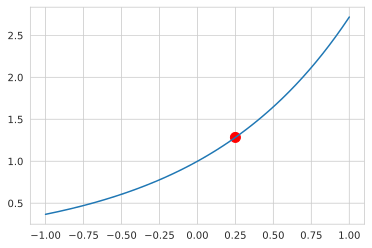

In [2]:


#@title Function { display-mode: "form" }
# The function we want to approximate
def f(x):
  return jnp.exp(x)

x = jnp.linspace(-1, 1, 1000).reshape(-1,1)
y = f(x)

plt.plot(x, y)
plt.scatter(0.25, f(0.25), color='red', s=100)
plt.show()

Let's say that we know the value of a function at a point: $f(x_0)$, as well as the derivative of the function evaluated at the point $f'(x_0)$. Then we can approximate the function around the point via the following function: 
\begin{align*}
f_{x_0}(x) &= f(x_0) + f'(x_0)(x-x_0) \\
\end{align*}
We refer to this function as a taylor polynomial/ taylor approximation. We can motivate this approach by referencing the definition of a derivative.


\begin{align}
f'(x_0) &:= \underset{x \rightarrow x_0}{\textrm{lim}} \frac{f(x) - f(x_0)}{x-x_0} \end{align}
If we know $x$ is reasonably close to $x_0$, then we can say the following:
 \begin{align*}
  f'(x_0) & \approx  \frac{f(x) - f(x_0)}{x - x_0} 
\end{align*}
We can then rearrange terms to get
 \begin{align*}
  f(x) & \approx f(x_0) + f'(x_0)(x-x_0)
\end{align*}
The way to interpret this is that we are approximating the function on the left $f(x)$ via the function on the right: $f(x_0) + f'(x_0)(x-x_0)$. Note this is a function of $x$ but is in some sense **parameterized** by $x_0$. 


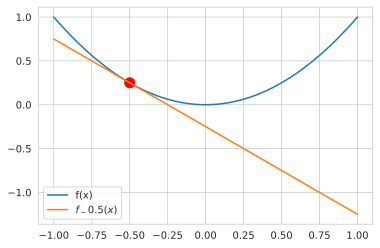

In [28]:
#@title **First Order Taylor Polynomial** { display-mode: "form" }
def linear_approx(f, x0, x):
  return f(x0) + jnp.dot(jax.jacfwd(f)(x0), (x-x0))

x = jnp.linspace(-1, 1, 1000)
x0 = -.5
f = lambda x: x**2
y = f(x)
y_approx = vmap(partial(linear_approx, f, x0))(x)

plt.plot(x, y, label=r'f(x)')
plt.scatter(x0, f(x0), color='red', s=100)
plt.plot(x, y_approx, label=fr'$f_{x0}(x)$')
plt.legend()
plt.show()

### **Second Order Taylor Polynomial**

\begin{align*}
f_{x_0}(x) &= f(x_0) + f'(x_0)(x-x_0) \frac{1}{2}f''(x_0)(x-x_0)^2\\
\end{align*}

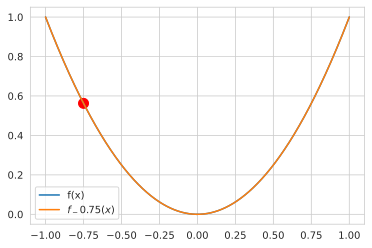

In [27]:
#@title Plot { display-mode: "form" }
def linear_approx(f, x0, x):
    return f(x0) + jnp.dot(jax.jacfwd(f)(x0), (x-x0)) + 0.5*jnp.dot((x-x0), jnp.dot(jax.hessian(f)(x0), x-x0))

x = jnp.linspace(-1, 1, 1000)
x0 = -0.75

f = lambda x: x**2 
y = f(x)
y_approx = vmap(partial(linear_approx, f, x0))(x)

plt.plot(x, y, label=r'f(x)')
plt.scatter(x0, f(x0), color='red', s=100)
plt.plot(x, y_approx, label=fr'$f_{x0}(x)$')
plt.legend()
plt.show()